Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to
keep all customers who have done transactions with us and select the join type accordingly.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns


importing all the tables

In [2]:
customer=pd.read_csv("C:\\Users\\HP\\Downloads\\Customer.csv")
transaction=pd.read_csv("C:\\Users\\HP\\Downloads\\Transactions.csv")
product=pd.read_csv("C:\\Users\\HP\\Downloads\\prod_cat_info.csv")

In [3]:
customer

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0
...,...,...,...,...
5642,274474,19-12-1992,M,2.0
5643,267666,24-12-1992,M,6.0
5644,270476,25-12-1992,F,3.0
5645,269626,27-12-1992,F,5.0


In [4]:
product

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


In [5]:
transaction

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop


Joining customer and transaction tables 

In [3]:
customer_tran=pd.merge(left=customer,right=transaction,how='right',left_on='customer_Id',right_on='cust_id',indicator=True)
customer_tran

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge
0,270351,26-09-1981,M,5.0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,both
1,270384,11-05-1973,F,8.0,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,both
2,273420,27-07-1992,M,8.0,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,both
3,271509,08-06-1981,M,3.0,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,both
4,273420,27-07-1992,M,8.0,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,274550,21-02-1972,M,7.0,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,both
23049,270022,27-04-1984,M,9.0,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,both
23050,271020,20-06-1976,M,8.0,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,both
23051,270911,22-05-1970,M,2.0,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,both


Joining the above table and the product table to get final table-Customer_Final

In [4]:
Customer_Final=pd.merge(left=customer_tran,right=product,how='left',left_on=('prod_cat_code','prod_subcat_code'),right_on=('prod_cat_code','prod_sub_cat_code'))
Customer_Final

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat
0,270351,26-09-1981,M,5.0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,both,Clothing,1,Women
1,270384,11-05-1973,F,8.0,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,both,Electronics,5,Computers
2,273420,27-07-1992,M,8.0,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,both,Books,6,DIY
3,271509,08-06-1981,M,3.0,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,both,Home and kitchen,11,Bath
4,273420,27-07-1992,M,8.0,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,both,Books,6,DIY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,274550,21-02-1972,M,7.0,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,both,Books,12,Academic
23049,270022,27-04-1984,M,9.0,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,both,Clothing,4,Mens
23050,271020,20-06-1976,M,8.0,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,both,Home and kitchen,2,Furnishing
23051,270911,22-05-1970,M,2.0,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,both,Books,11,Children


#2. Prepare a summary report for the merged data set.

#a. Get the column names and their corresponding data types

In [8]:
Customer_Final.dtypes

customer_Id             int64
DOB                    object
Gender                 object
city_code             float64
transaction_id          int64
cust_id                 int64
tran_date              object
prod_subcat_code        int64
prod_cat_code           int64
Qty                     int64
Rate                    int64
Tax                   float64
total_amt             float64
Store_type             object
_merge               category
prod_cat               object
prod_sub_cat_code       int64
prod_subcat            object
dtype: object

In [5]:
def dtfunc(x):
    x = x.replace('/', '-')
    x = pd.to_datetime(x, format = '%d-%m-%Y')
    return x

In [6]:
Customer_Final['tran_date'] = Customer_Final.tran_date.apply(lambda x : dtfunc(x))

#b. Top/Bottom 10 observations

In [7]:
Customer_Final.head()


,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat
0,270351,26-09-1981,M,5.0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,both,Clothing,1,Women
1,270384,11-05-1973,F,8.0,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,both,Electronics,5,Computers
2,273420,27-07-1992,M,8.0,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,both,Books,6,DIY
3,271509,08-06-1981,M,3.0,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,both,Home and kitchen,11,Bath
4,273420,27-07-1992,M,8.0,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,both,Books,6,DIY


In [8]:
Customer_Final.tail()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat
23048,274550,21-02-1972,M,7.0,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,both,Books,12,Academic
23049,270022,27-04-1984,M,9.0,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,both,Clothing,4,Mens
23050,271020,20-06-1976,M,8.0,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,both,Home and kitchen,2,Furnishing
23051,270911,22-05-1970,M,2.0,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,both,Books,11,Children
23052,271961,15-01-1982,M,1.0,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,both,Books,11,Children


#c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [13]:
summary1=Customer_Final[['Qty','Rate','Tax','total_amt']].describe().T
summary1.loc[:,['min','25%','50%','75%','max']]

,min,25%,50%,75%,max
Qty,-5.000,1.00,3.00,4.000,5.0
Rate,-1499.000,312.00,710.00,1109.000,1500.0
Tax,7.350,98.28,199.08,365.715,787.5
total_amt,-8270.925,762.45,1754.74,3569.150,8287.5


#d. Frequency tables for all the categorical variables

In [9]:
categorical=[i for i in Customer_Final.dtypes.index if Customer_Final.dtypes[i] == 'object']

categorical

['DOB', 'Gender', 'Store_type', 'prod_cat', 'prod_subcat']

In [10]:
for x in categorical:
    print('\nFrequency of Categories for variable %s'%x)
    print(pd.DataFrame(Customer_Final[x].value_counts()))



Frequency of Categories for variable DOB
            DOB
27-12-1988   32
17-09-1982   32
25-02-1974   27
20-03-1972   25
18-11-1991   24
...         ...
29-01-1976    1
01-05-1980    1
23-06-1988    1
25-06-1985    1
10-06-1972    1

[3987 rows x 1 columns]

Frequency of Categories for variable Gender
   Gender
M   11811
F   11233

Frequency of Categories for variable Store_type
                Store_type
e-Shop                9311
MBR                   4661
Flagship store        4577
TeleShop              4504

Frequency of Categories for variable prod_cat
                  prod_cat
Books                 6069
Electronics           4898
Home and kitchen      4129
Footwear              2999
Clothing              2960
Bags                  1998

Frequency of Categories for variable prod_subcat
                     prod_subcat
Women                       3048
Mens                        2912
Kids                        1997
Tools                       1062
Fiction                     104

3. Generate histograms for all continuous variables and frequency bars for categorical variables.

(array([ 457.,  458.,  405.,  438.,  419.,    0., 4214., 4123., 4174.,
        8365.]),
 array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]),
 <BarContainer object of 10 artists>)

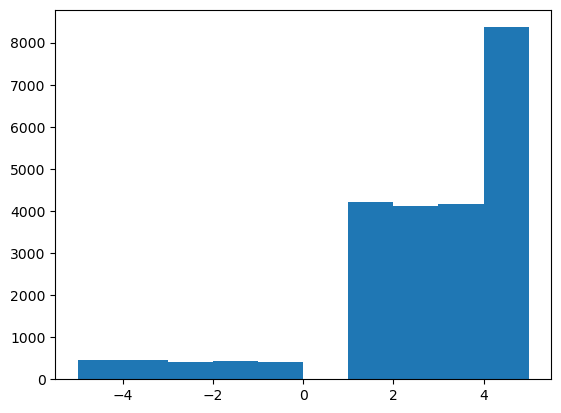

In [11]:
plt.hist(Customer_Final['Qty'])


(array([ 496.,  446.,  464.,  411.,  360., 3413., 4335., 4336., 4349.,
        4443.]),
 array([-1.4990e+03, -1.1991e+03, -8.9920e+02, -5.9930e+02, -2.9940e+02,
         5.0000e-01,  3.0040e+02,  6.0030e+02,  9.0020e+02,  1.2001e+03,
         1.5000e+03]),
 <BarContainer object of 10 artists>)

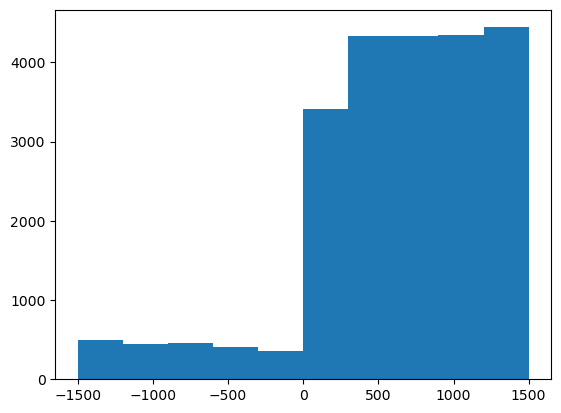

In [12]:
plt.hist(Customer_Final['Rate'])

(array([4868., 5303., 3023., 2944., 1912., 1823., 1078., 1058.,  523.,
         521.]),
 array([  7.35 ,  85.365, 163.38 , 241.395, 319.41 , 397.425, 475.44 ,
        553.455, 631.47 , 709.485, 787.5  ]),
 <BarContainer object of 10 artists>)

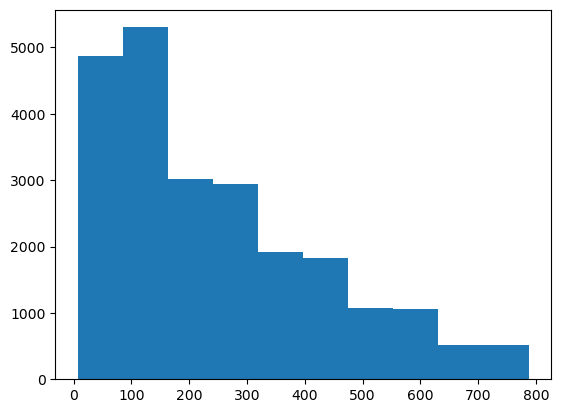

In [13]:
plt.hist(Customer_Final['Tax'])

(array([ 109.,  231.,  360.,  564.,  913., 9062., 5505., 3435., 1930.,
         944.]),
 array([-8270.925 , -6615.0825, -4959.24  , -3303.3975, -1647.555 ,
            8.2875,  1664.13  ,  3319.9725,  4975.815 ,  6631.6575,
         8287.5   ]),
 <BarContainer object of 10 artists>)

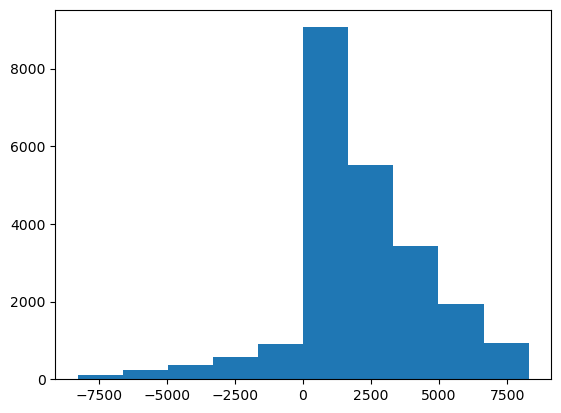

In [14]:
plt.hist(Customer_Final['total_amt'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

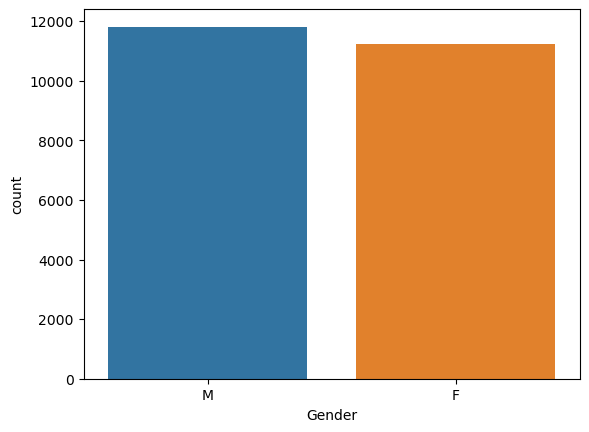

In [15]:
sns.countplot(Customer_Final['Gender'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DOB', ylabel='count'>

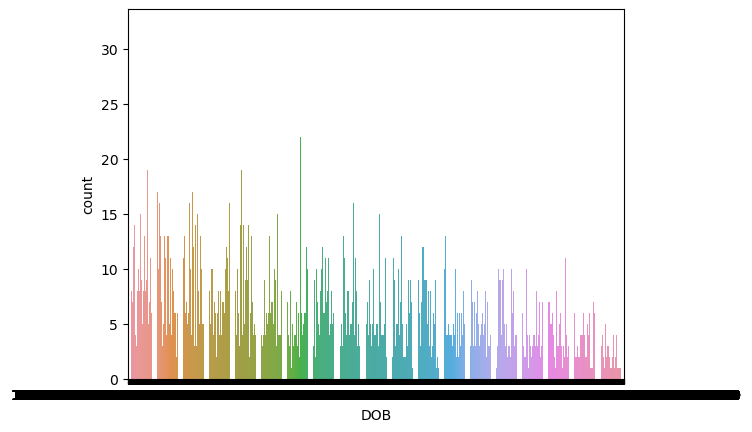

In [189]:
sns.countplot(Customer_Final['DOB'])


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Store_type', ylabel='count'>

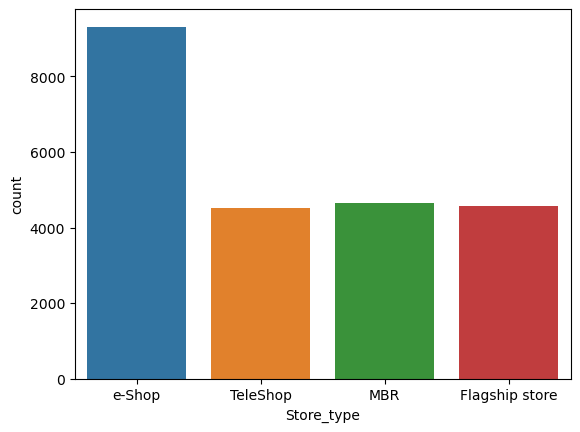

In [16]:
sns.countplot(Customer_Final['Store_type'])


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='prod_cat', ylabel='count'>

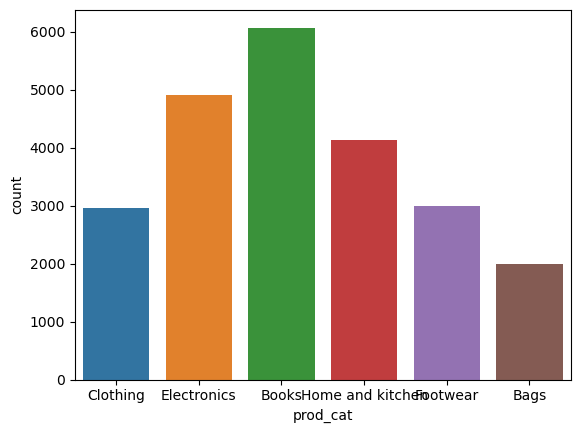

In [187]:
sns.countplot(Customer_Final['prod_cat'])


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='prod_subcat', ylabel='count'>

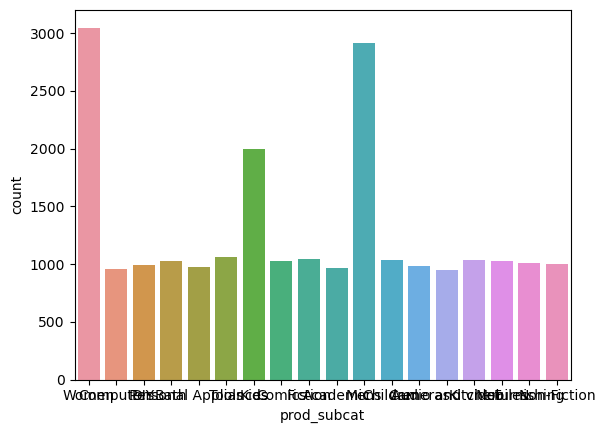

In [17]:
sns.countplot(Customer_Final['prod_subcat'])

4. Calculate the following information using the merged dataset :
a. Time period of the available transaction data

In [18]:
print('The date starting from', Customer_Final.tran_date.min())
print('The date starting ending to', Customer_Final.tran_date.max())
print('/n')
print(Customer_Final.tran_date.max()-Customer_Final.tran_date.min())


The date starting from 2011-01-25 00:00:00
The date starting ending to 2014-02-28 00:00:00
/n
1130 days 00:00:00


Count of transactions where the total amount of transaction was negative

In [19]:
Customer_Final.total_amt[Customer_Final.total_amt<0].count()

2177

#Analyze which product categories are more popular among females vs male customers.

In [20]:

male=Customer_Final[Customer_Final.Gender=='M'].groupby('prod_cat')[['Gender']].count().sort_values(by='Gender',ascending=False)
female=Customer_Final[Customer_Final.Gender=='F'].groupby('prod_cat')[['Gender']].count().sort_values(by='Gender',ascending=False)

pd.DataFrame(male)
pd.DataFrame(female)

print('for male' ,male)
print("")
print('')
print('For female' ,female)

for male                   Gender
prod_cat                
Books               3116
Electronics         2570
Home and kitchen    2134
Clothing            1518
Footwear            1469
Bags                1004


For female                   Gender
prod_cat                
Books               2949
Electronics         2328
Home and kitchen    1994
Footwear            1529
Clothing            1439
Bags                 994


 Which City code has the maximum customers and what was the percentage of customers from that city?

In [21]:
city=pd.DataFrame(Customer_Final.groupby('city_code').customer_Id.count().sort_values(ascending=False))
city['percent']=city.apply(lambda x : x/sum(x)*100)
city.head(1)

,customer_Id,percent
city_code,,
4.0,2422,10.509872


 Which store type sells the maximum products by value and by quantity?

In [22]:
Customer_Final.groupby('Store_type')[['total_amt','Qty']].sum().sort_values(by=['total_amt','Qty'],ascending=False).head(1)

,total_amt,Qty
Store_type,,
e-Shop,19824816.05,22763


#8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [23]:
total2=pd.DataFrame(Customer_Final[(Customer_Final['Store_type']=='Flagship store') & (Customer_Final['prod_cat'].isin (['Electronics', 'Clothing']))].groupby('prod_cat').total_amt.sum())

In [24]:
total2.sum()

total_amt    3409559.27
dtype: float64

#What was the total amount earned from "Male" customers under the "Electronics" category?

In [25]:
Customer_Final[(Customer_Final['Gender']=='M') & (Customer_Final['prod_cat']=='Electronics')].groupby('prod_cat').total_amt.sum()

prod_cat
Electronics    5703109.425
Name: total_amt, dtype: float64

#. How many customers have more than 10 unique transactions, after removing all transactions 
#which have any negative amounts

In [44]:
Customer_Final1=Customer_Final[Customer_Final['total_amt']>0].groupby(['customer_Id'])[['transaction_id']].nunique()

In [46]:
count1=Customer_Final1[Customer_Final1['transaction_id']>10]
count1.count()


transaction_id    6
dtype: int64

#1. For all customers aged between 25 - 35, find out:
 a. What was the total amount spent for “Electronics” and “Books” product categories?


In [48]:
today = dt.datetime.today()
Customer_Final['DOB'] = pd.to_datetime(Customer_Final['DOB'])
Customer_Final['Cust_age'] = (today - Customer_Final['DOB']) / dt.timedelta(days=365.25)
Customer_Final['Cust_age'] = Customer_Final['Cust_age'].astype(int)

In [40]:
Customer_Final

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat,Cust_age
0,270351,1981-09-26,M,5.0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,both,Clothing,1,Women,41
1,270384,1973-11-05,F,8.0,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,both,Electronics,5,Computers,49
2,273420,1992-07-27,M,8.0,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,both,Books,6,DIY,30
3,271509,1981-08-06,M,3.0,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,both,Home and kitchen,11,Bath,41
4,273420,1992-07-27,M,8.0,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,both,Books,6,DIY,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,274550,1972-02-21,M,7.0,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,both,Books,12,Academic,51
23049,270022,1984-04-27,M,9.0,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,both,Clothing,4,Mens,38
23050,271020,1976-06-20,M,8.0,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,both,Home and kitchen,2,Furnishing,46
23051,270911,1970-05-22,M,2.0,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,both,Books,11,Children,52


In [51]:
count2=Customer_Final[(Customer_Final['Cust_age']>=25) & (Customer_Final['Cust_age']<=35 ) & (Customer_Final['prod_cat'].isin (['Electronics','Books']))].groupby('prod_cat').total_amt.sum()
count2.sum()

5890413.555

In [52]:
Customer_Final[(Customer_Final['Cust_age']>=25) & (Customer_Final['Cust_age']<=35 )]

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat,Cust_age
2,273420,1992-07-27,M,8.0,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,both,Books,6,DIY,30
4,273420,1992-07-27,M,8.0,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,both,Books,6,DIY,30
23,268509,1989-08-17,M,10.0,91116291703,268509,2014-02-20,1,2,4,1243,522.060,5494.060,MBR,both,Footwear,1,Mens,33
28,268444,1992-02-01,F,6.0,88853694830,268444,2014-02-20,4,4,-3,-80,25.200,-265.200,MBR,both,Bags,4,Women,31
29,267466,1987-06-08,F,7.0,99581788104,267466,2014-02-20,3,2,1,96,10.080,106.080,Flagship store,both,Footwear,3,Women,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23033,268885,1989-04-14,F,6.0,32887353269,268885,2011-01-25,3,1,1,276,28.980,304.980,Flagship store,both,Clothing,3,Kids,33
23034,275227,1989-09-23,M,4.0,28972634039,275227,2011-01-25,9,3,1,334,35.070,369.070,MBR,both,Electronics,9,Cameras,33
23035,267094,1992-11-24,M,9.0,42161597232,267094,2011-01-25,3,1,3,147,46.305,487.305,MBR,both,Clothing,3,Kids,30
23038,274306,1989-12-01,M,2.0,61812307223,274306,2011-01-25,4,4,4,1447,607.740,6395.740,e-Shop,both,Bags,4,Women,33


In [53]:

Customer_Final['tran_date']=pd.to_datetime(Customer_Final['tran_date'])
Customer_Final.dtypes


customer_Id                   int64
DOB                  datetime64[ns]
Gender                       object
city_code                   float64
transaction_id                int64
cust_id                       int64
tran_date            datetime64[ns]
prod_subcat_code              int64
prod_cat_code                 int64
Qty                           int64
Rate                          int64
Tax                         float64
total_amt                   float64
Store_type                   object
_merge                     category
prod_cat                     object
prod_sub_cat_code             int64
prod_subcat                  object
Cust_age                      int32
dtype: object

 b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [54]:
start_date = dt.datetime(2014, 1, 1)
end_date = dt.datetime(2014, 3, 1)

# Filter customers and calculate total amount spent
total_spent = (Customer_Final[(Customer_Final['Cust_age'] >= 25) & (Customer_Final['Cust_age'] <= 35) & 
                              (Customer_Final['tran_date'] >= start_date) & (Customer_Final['tran_date'] <= end_date)]
               .groupby('customer_Id')['total_amt'].sum()).sum()

print(total_spent)

629354.96
